In [38]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])

In [39]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [40]:
images.shape

(2, 427, 640, 3)

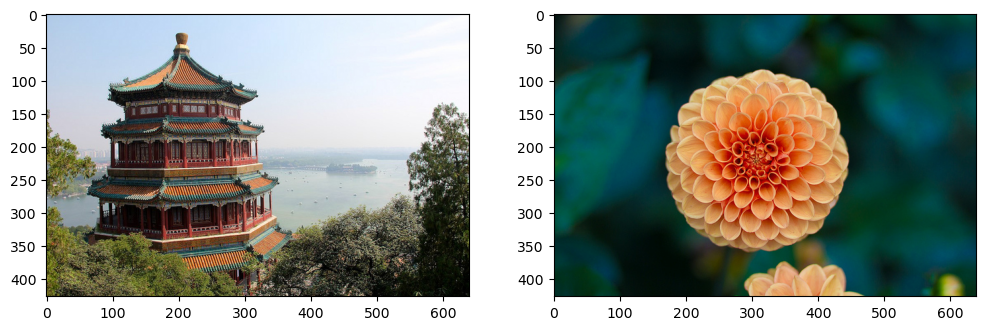

In [41]:
_, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(images[0, :, :, :])
ax[1].imshow(images[1, :, :, :])
plt.show()

In [42]:
batch_size, height, width, channels = images.shape
print(f"batch size = {batch_size}")
print(f"height = {height}")
print(f"width = {width}")
print(f"channels = {channels}")

batch size = 2
height = 427
width = 640
channels = 3


In [43]:
def crop(images):
    return images[150:220, 130:250]

In [57]:
max_pool = keras.layers.MaxPool2D(pool_size=2)
avg_pool = keras.layers.AveragePooling2D(pool_size=2)

In [58]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output_max = max_pool(cropped_images)

Saving figure china_max_pooling


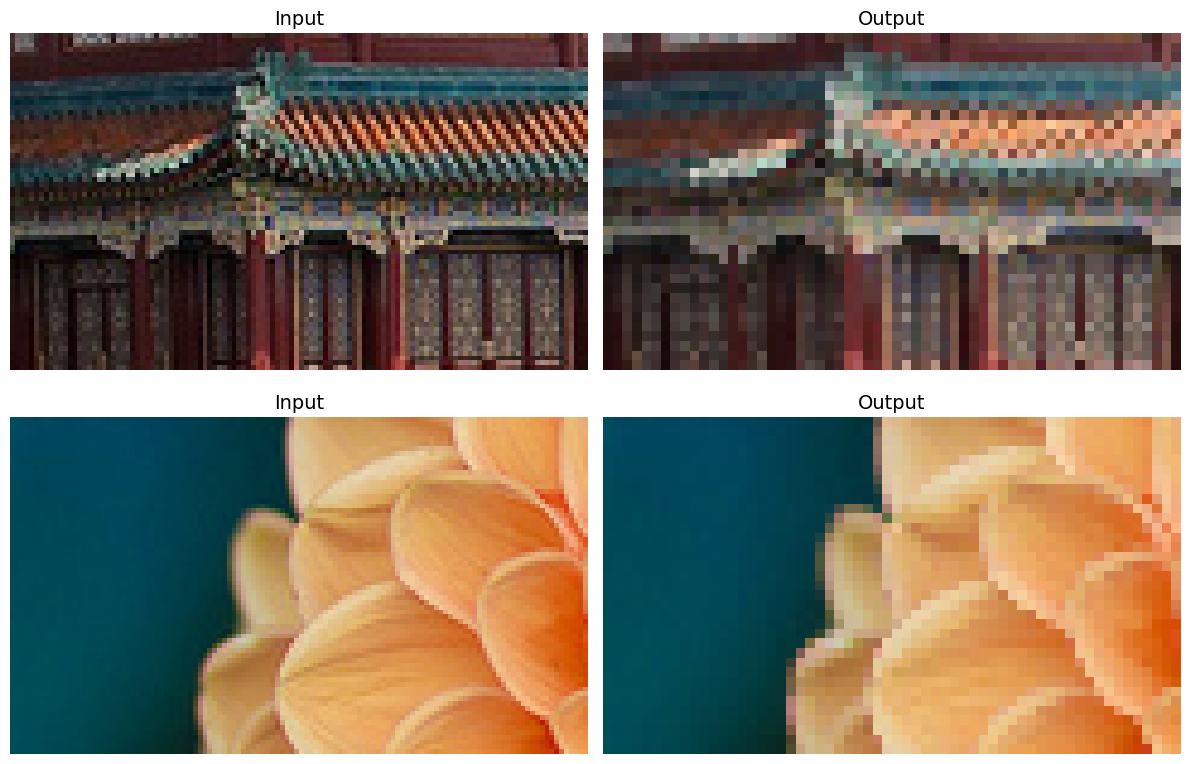

In [59]:
_, ax = plt.subplots(2, 2, figsize=(12, 8))

for i in range(2):
    ax[i][0].set_title("Input", fontsize=14)
    ax[i][0].imshow(cropped_images[i])  # plot the 1st image
    ax[i][0].axis("off")

    ax[i][1].set_title("Output", fontsize=14)
    ax[i][1].imshow(output_max[i])  # plot the output for the 1st image
    ax[i][1].axis("off")

save_fig("china_max_pooling")
plt.show()

In [60]:
output_avg = avg_pool(cropped_images)

Saving figure china_max_pooling


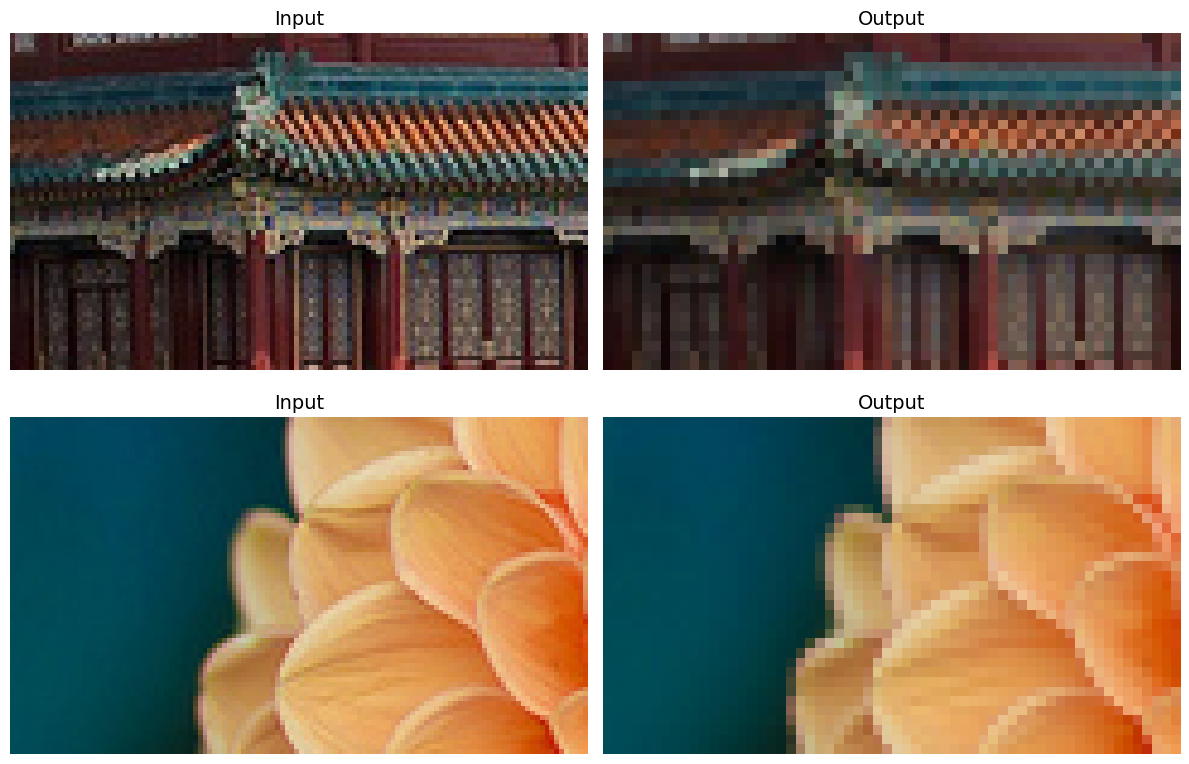

In [61]:
_, ax = plt.subplots(2, 2, figsize=(12, 8))

for i in range(2):
    ax[i][0].set_title("Input", fontsize=14)
    ax[i][0].imshow(cropped_images[i])  # plot the 1st image
    ax[i][0].axis("off")

    ax[i][1].set_title("Output", fontsize=14)
    ax[i][1].imshow(output_avg[i])  # plot the output for the 1st image
    ax[i][1].axis("off")

save_fig("china_max_pooling")
plt.show()